# Exploración aquí:

Análisis De Datos Exploratorios:

In [4]:
# - Importación de librerías:

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# - Importación del set de datos:

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

# - Guardado:

rutg = '../data/raw/dataset.csv'

# - Lectura:

df = pd.read_csv(url, delimiter=',')
df.to_csv(rutg, index=False)
print("El archivo fue guardado en la ruta:", rutg)

# - Vista previa:

df

El archivo fue guardado en la ruta: ../data/raw/dataset.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


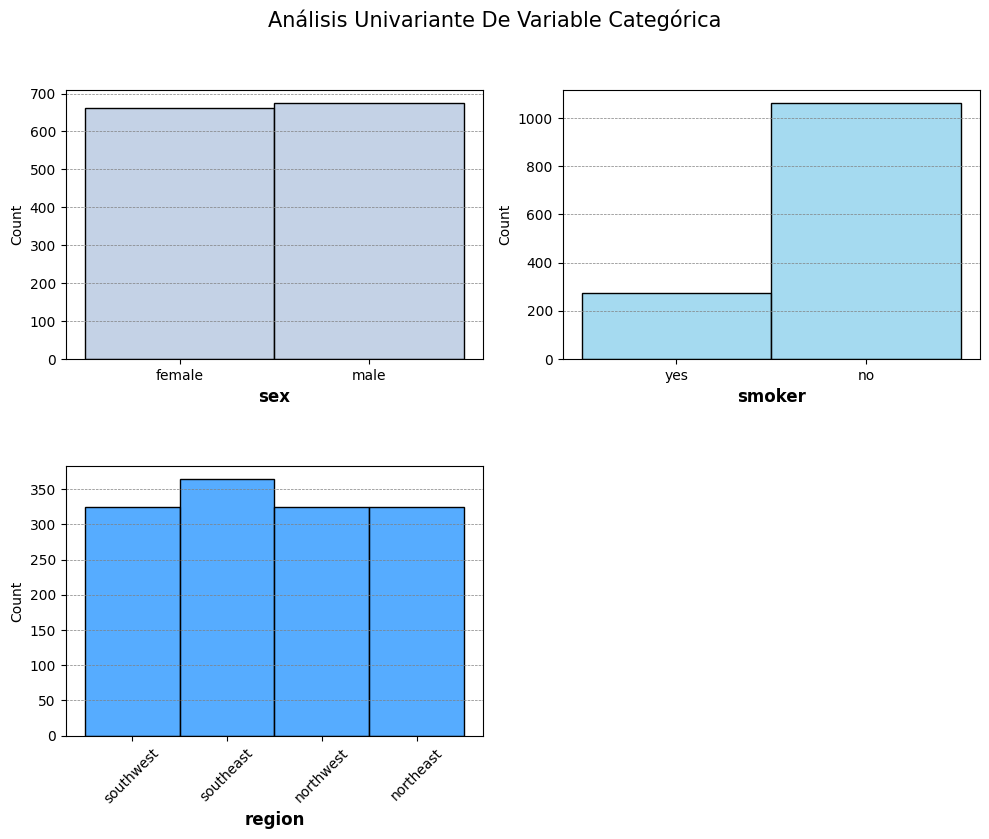

In [7]:
# - Parámetros:

fig, axis = plt.subplots(2, 2, figsize=(10, 8))

# - Título:

fig.suptitle("Análisis Univariante De Variable Categórica", fontsize=15)

# - Distribución:

sns.histplot(ax=axis[0, 0], data=df, x='sex', color='lightsteelblue')
sns.histplot(ax=axis[0, 1], data=df, x='smoker', color='skyblue')
sns.histplot(ax=axis[1, 0], data=df, x='region', color='dodgerblue')

# - Visualización:

axis[1, 1].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.88, hspace=0.4)

for ax in axis.flat:
    if ax.has_data():
        ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
        x_labels = ax.get_xticklabels()
        if len(x_labels) > 3:
            for label in x_labels:
                label.set_rotation(45)
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')

plt.show()

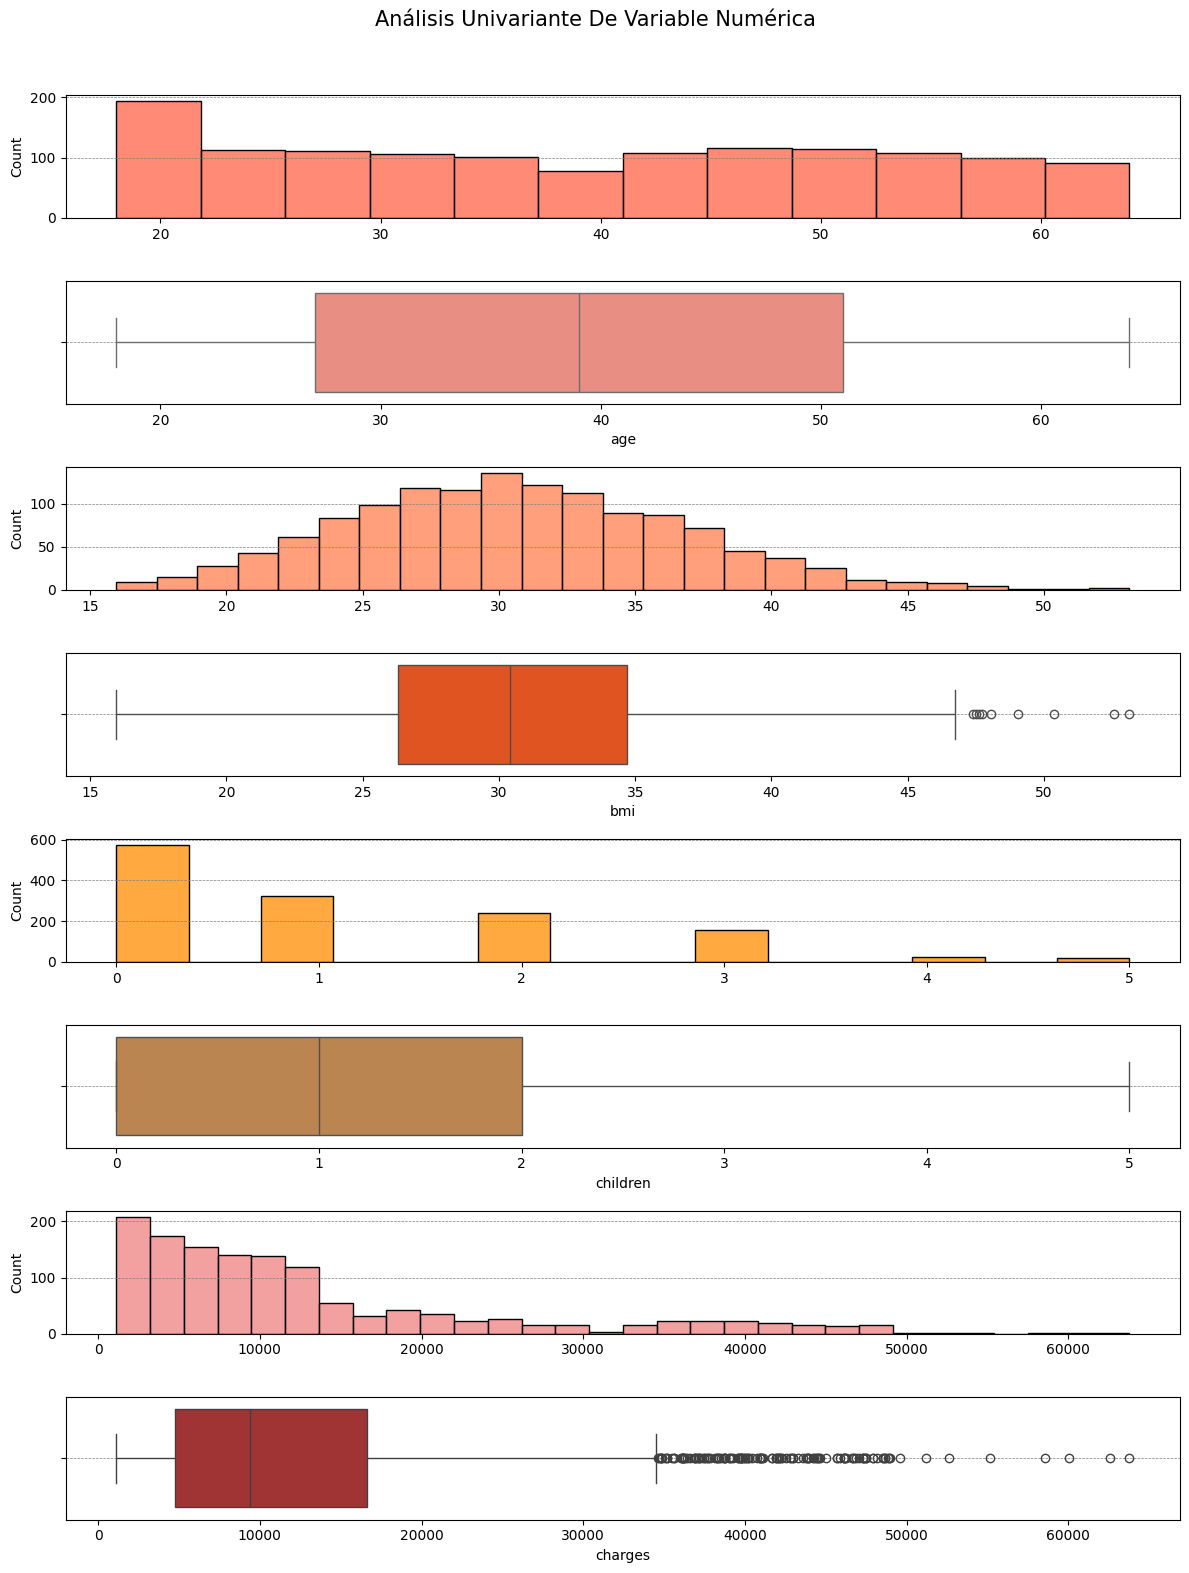

In [8]:
# - Parámetros:

fig, axis = plt.subplots(8, 1, figsize=(12, 16))
fig.suptitle("Análisis Univariante De Variable Numérica", fontsize=15)

# - Lista De Variables:

variables = [
    ("age", "tomato", "salmon"),
    ("bmi", "coral", "orangered"),
    ("children", "darkorange", "peru"),
    ("charges", "lightcoral", "firebrick"),
]

# - Gráficos:

for i, (var, hist_color, box_color) in enumerate(variables):
    sns.histplot(ax=axis[2*i], data=df, x=var, color=hist_color).set(xlabel=None)
    sns.boxplot(ax=axis[2*i + 1], data=df, x=var, color=box_color)

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.96])
for ax in axis.flat:
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.show()

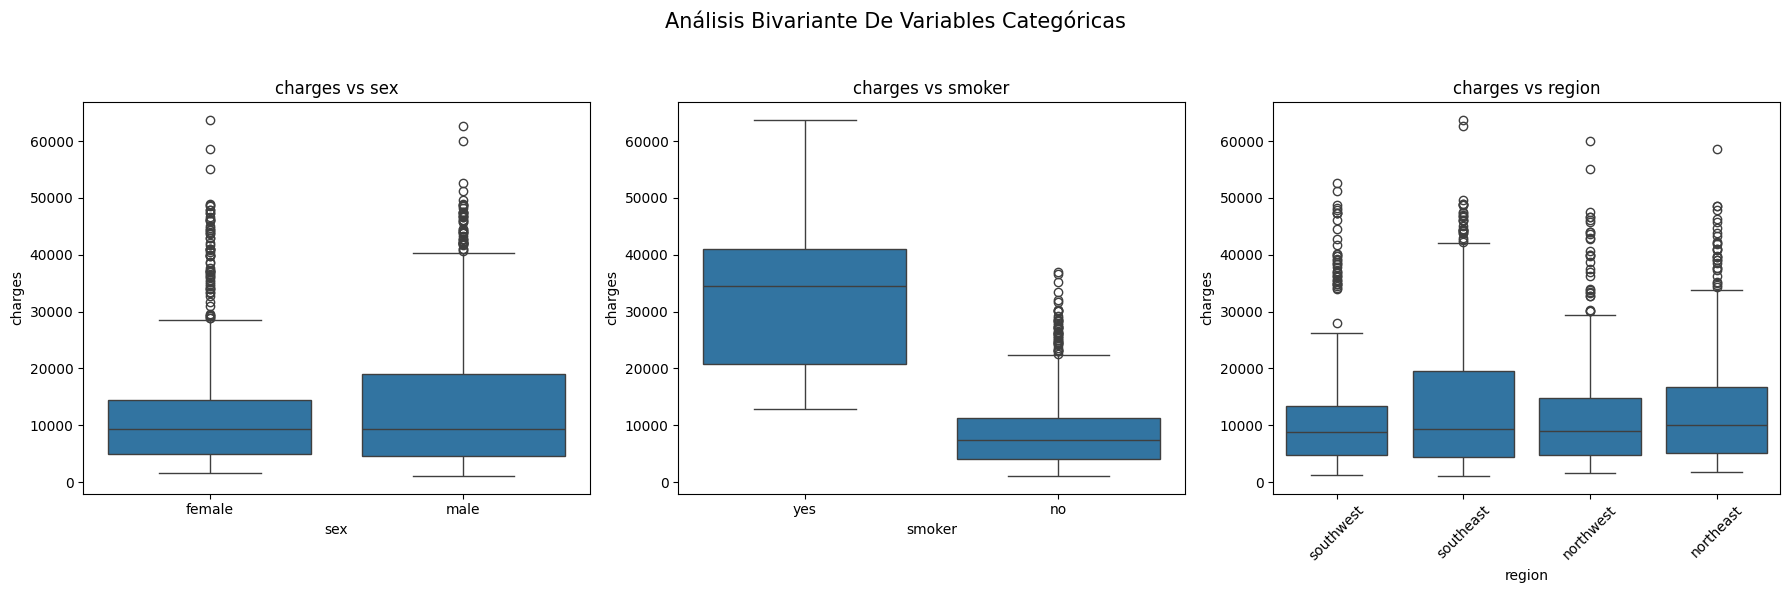

In [10]:
# - Parámetros:

fig, axis = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Análisis Bivariante De Variables Categóricas", fontsize=15)

# - Gráficos:

sns.boxplot(ax=axis[0], data=df, x="sex", y="charges")
axis[0].set_title("charges vs sex")

sns.boxplot(ax=axis[1], data=df, x="smoker", y="charges")
axis[1].set_title("charges vs smoker")

sns.boxplot(ax=axis[2], data=df, x="region", y="charges")
axis[2].set_title("charges vs region")
axis[2].tick_params(axis='x', rotation=45)

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


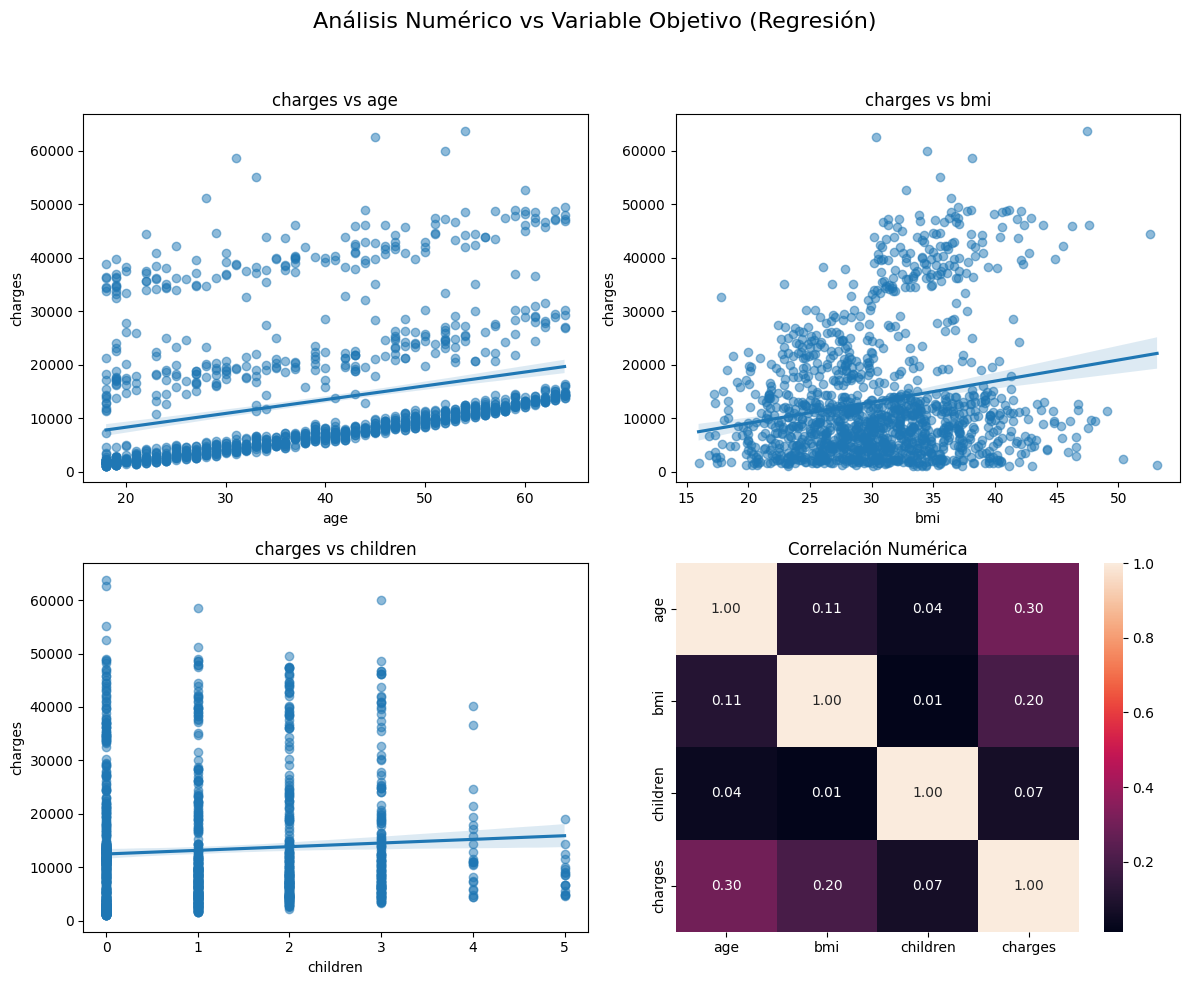

In [ ]:
# - Parámetros:

fig, axis = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Análisis Bivariante De Variables Numéricas", fontsize=16)

# - Diagramas de dispersión:

sns.regplot(ax=axis[0, 0], data=df, x="age", y="charges", scatter_kws={'alpha':0.5})
axis[0, 0].set_title("charges vs age")

sns.regplot(ax=axis[0, 1], data=df, x="bmi", y="charges", scatter_kws={'alpha':0.5})
axis[0, 1].set_title("charges vs bmi")

sns.regplot(ax=axis[1, 0], data=df, x="children", y="charges", scatter_kws={'alpha':0.5})
axis[1, 0].set_title("charges vs children")

# - Mapa de calor de correlación:

num_vars = ["age", "bmi", "children", "charges"]
sns.heatmap(df[num_vars].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
axis[1, 1].set_title("Correlación Numérica")

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()